In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm

In [2]:
x=[2.0,1.5,8.0,7.0,9.0,2.5,0.8]
y=[1.1,2.0,7.0,7.5,8.0,2.7,1.2]

# plt.scatter(x,y)
# plt.show()

[0]
[1]
[[0.20790021 0.22176022]]
-0.9375


No handles with labels found to put in legend.


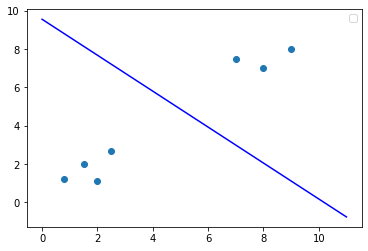

In [3]:
X=np.array([[2,1.1],[1.5,2],[8,7],[7,7.5],[9,8],[2.5,2.7],[0.8,1.2]])
Y=[0,0,1,1,1,0,0]
clf=svm.SVC(kernel='linear',C=1)
clf.fit(X,Y)
p1=clf.predict([[0.7,0.8]])
print(p1)
p2=clf.predict([[8.5,7]])
print(p2)


w=clf.coef_
print(w)
a=-w[0][0]/w[0][1]
print(a)
x=np.linspace(0,11)
y=a*x-clf.intercept_[0]/w[0][1]
plt.plot(x,y,color='blue')
plt.scatter(X[:,0],X[:,1])
plt.legend()
plt.show()

In [4]:
from sklearn import datasets,svm
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import matplotlib.pyplot as plt 
from mlxtend.plotting import plot_decision_regions

Y_Test= [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Y Pred= [1 0 2 1 2 0 1 2 1 1 2 0 0 0 0 2 2 1 1 2 0 1 0 2 2 2 2 2 0 0]
Accuracy= 0.9
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30
 [[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]


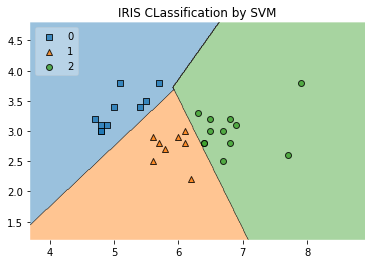

In [5]:
iris=datasets.load_iris()
X=iris.data[:,:2]
Y=iris.target
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
svc=svm.SVC(kernel='linear',C=1)
svc.fit(X_train,Y_train)
Y_p=svc.predict(X_test)
print("Y_Test=",Y_test)
print("Y Pred=",Y_p)
acc=accuracy_score(Y_test,Y_p)
print("Accuracy=",acc)
CR=classification_report(Y_test,Y_p)
CM=confusion_matrix(Y_test,Y_p)
print(CR,CM)

plot_decision_regions(X_test,Y_p,clf=svc,res=0.02,legend=2)
plt.title('IRIS CLassification by SVM')
plt.show()

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Y_Test= [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Y Pred= [1 0 2 1 2 0 1 2 1 1 2 0 0 0 0 2 2 1 1 1 0 1 0 1 2 2 1 2 0 0]
Accuracy= 0.8
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.64      0.78      0.70         9
           2       0.78      0.64      0.70        11

    accuracy                           0.80        30
   macro avg       0.80      0.80      0.80        30
weighted avg       0.81      0.80      0.80        30
 [[10  0  0]
 [ 0  7  2]
 [ 0  4  7]]


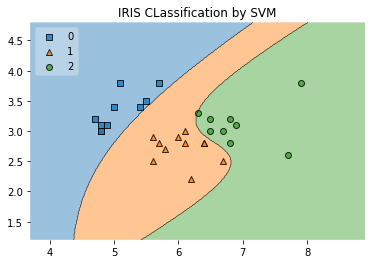

In [16]:
iris=datasets.load_iris()
X=iris.data[:,:2]
Y=iris.target
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

svc=svm.SVC(kernel='poly',degree=5,C=0.1)
svc.fit(X_train,Y_train)
Y_p=svc.predict(X_test)
print("Y_Test=",Y_test)
print("Y Pred=",Y_p)
acc=accuracy_score(Y_test,Y_p)
print("Accuracy=",acc)

CR=classification_report(Y_test,Y_p)
CM=confusion_matrix(Y_test,Y_p)
print(CR,CM)
plot_decision_regions(X_test,Y_p,clf=svc,res=0.02,legend=2)
plt.title('IRIS CLassification by SVM')
plt.show()

In [7]:
from sklearn.model_selection import GridSearchCV

In [8]:
param_grid={'C':[0.1,1,2],'gamma':[1,0.1,0.01,0.001]}

grid=GridSearchCV(svc,param_grid,verbose=3)

grid.fit(X_train,Y_train)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.659, total=   6.9s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.8s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.800, total=  18.5s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   25.3s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.821, total=   3.2s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.707, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.800, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.795, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.341, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.425, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.333, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:  2.5min finished
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=5,
                           gamma='auto_deprecated', kernel='poly', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 2], 'gamma': [1, 0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [9]:
grid.best_params_

{'C': 0.1, 'gamma': 0.1}

In [10]:
grid.best_estimator_

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=5, gamma=0.1, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [12]:
grid_pred=grid.predict(X_test)
print(grid_pred)

[1 0 2 1 2 0 1 2 1 1 2 0 0 0 0 2 2 1 1 1 0 1 0 1 2 2 1 2 0 0]


In [15]:
acc=accuracy_score(Y_test,grid_pred)
print(acc)

0.8
